In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("stock_market_data.csv")
df

,Company,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
0,Alpha Corp,01/04/24,199.05,200.21,191.44,199.85,189189,0.0,1,199.85
1,Alpha Corp,02/04/24,196.94,199.09,194.29,194.76,876449,0.0,0,194.76
2,Alpha Corp,03/04/24,193.36,200.31,192.08,193.96,591919,0.0,1,193.96
3,Alpha Corp,04/04/24,192.53,195.10,188.55,189.43,367701,0.0,1,189.43
4,Alpha Corp,05/04/24,193.90,201.64,183.93,194.21,748551,0.0,1,194.21
...,...,...,...,...,...,...,...,...,...,...
910,Epsilon Plc,26/09/24,214.67,222.79,214.62,221.07,990621,0.0,1,221.07
911,Epsilon Plc,27/09/24,218.50,225.57,216.52,217.95,804110,0.0,1,217.95
912,Epsilon Plc,28/09/24,223.08,226.74,215.67,217.59,101424,0.0,1,217.59
913,Epsilon Plc,29/09/24,217.77,219.25,213.45,215.27,201043,0.0,1,215.27


In [3]:
df=df.drop_duplicates()

df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company       915 non-null    object        
 1   Date          915 non-null    datetime64[ns]
 2   Open          915 non-null    float64       
 3   High          915 non-null    float64       
 4   Low           915 non-null    float64       
 5   Close         915 non-null    float64       
 6   Volume        915 non-null    int64         
 7   Dividends     915 non-null    float64       
 8   Stock Splits  915 non-null    int64         
 9   Adj Close     915 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 71.6+ KB


C:\Users\Swarupa\AppData\Local\Temp\ipykernel_10792\3982835245.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [4]:
import plotly.graph_objects as go
data = df[df['Company'] == "Alpha Corp"]
fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close']
)])
fig.show()



In [5]:
import pandas as pd
import plotly.express as px

df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime type
filtered_data = df[(df['Date'] >= '2024-04-01') & (df['Date'] <= '2024-09-30')]

# Group by Date and sum the Volume
volume_data = filtered_data.groupby('Date')['Volume'].sum().reset_index()

# Create a Plotly bar chart
fig = px.bar(volume_data, 
             x='Date', 
             y='Volume', 
             title="Trading Volume Over Time (Starting from April 2024)",
             labels={'Volume': 'Trading Volume', 'Date': 'Date'})

# Adjust the layout for better visibility
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    width=800,               # Set figure width
    height=500                # Set figure height
)

# Show the interactive plot
fig.show()


<Axes: xlabel='Company', ylabel='Company'>

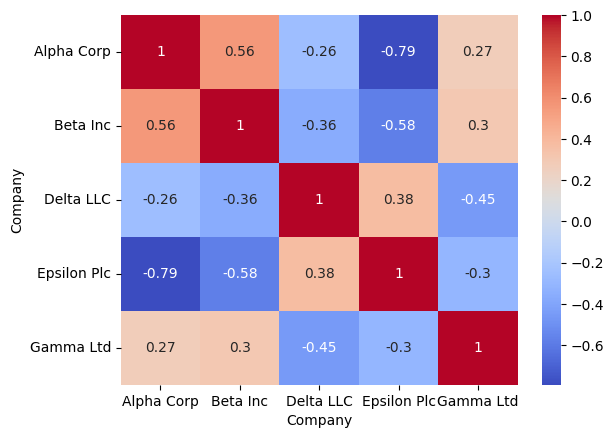

In [6]:
#correlation plot
pivot_data = df.pivot(index='Date', columns='Company', values='Adj Close')
sn.heatmap(pivot_data.corr(), annot=True, cmap="coolwarm")


In [7]:
df = df.sort_values(by=['Company', 'Date'])
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df

,Company,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close,Next_Close
0,Alpha Corp,2024-01-04,199.05,200.21,191.44,199.85,189189,0.00,1,199.85,185.53
30,Alpha Corp,2024-01-05,191.41,195.62,185.23,185.53,452059,0.00,1,185.53,177.59
61,Alpha Corp,2024-01-06,183.00,187.72,176.80,177.59,400863,0.29,1,174.72,174.88
91,Alpha Corp,2024-01-07,176.53,179.70,170.17,174.88,843906,0.00,1,174.88,168.11
122,Alpha Corp,2024-01-08,161.20,168.49,159.42,168.11,374449,0.00,1,168.11,159.11
...,...,...,...,...,...,...,...,...,...,...,...
407,Gamma Ltd,2024-12-05,158.94,163.62,158.37,161.76,147634,0.00,1,161.76,161.82
438,Gamma Ltd,2024-12-06,163.69,164.30,155.48,161.82,137063,0.00,0,161.82,164.55
468,Gamma Ltd,2024-12-07,162.44,170.59,161.25,164.55,952986,0.00,1,164.55,152.53
499,Gamma Ltd,2024-12-08,154.98,162.78,151.44,152.53,700061,0.00,1,152.53,150.73


In [8]:
features = ['Open', 'High', 'Low', 'Volume', 'Close']
target = 'Next_Close'
df = df.dropna()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Example prediction for the last row
example_features = X.iloc[-1].values.reshape(1, -1)
predicted_next_close = model.predict(example_features)
print(f"Predicted Next Close: {predicted_next_close[0]:.2f}")

Mean Squared Error: 80.27
R-squared: 0.94
Predicted Next Close: 154.31


c:\Users\Swarupa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names




Feature Importances:
  Feature  Importance
0    Open    0.386256
2     Low    0.211949
1    High    0.199566
4   Close    0.192644
3  Volume    0.009585


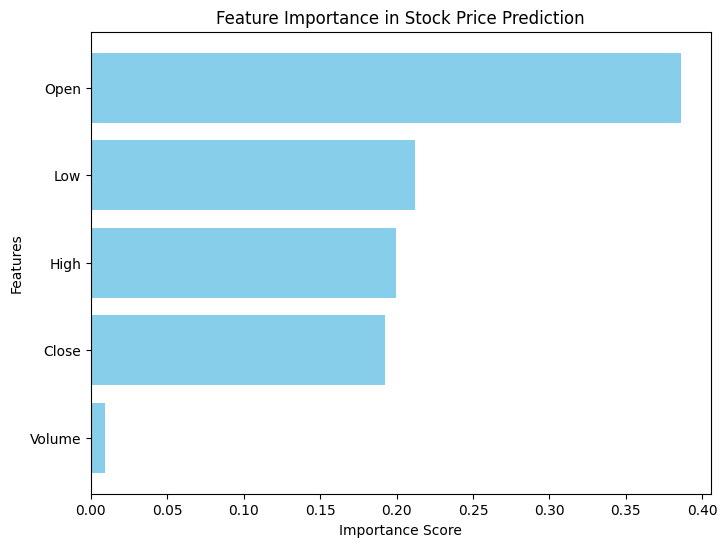

In [13]:
# Feature Importance Extraction
feature_importances = model.feature_importances_
feature_names = features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("\nFeature Importances:")
print(importance_df)

# Visualization of Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Stock Price Prediction')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [15]:
# Stock Predictor Function
def predict_stock_price(company, date):
    """
    Predicts the next day's closing price for a specific company on a specific date.
    """
    
    # Filter the dataset for the specified company and date
    company_data = df[df['Company'] == company]
    company_data = company_data[company_data['Date'] <= pd.to_datetime(date)]
    
    if company_data.empty:
        return f"No data available for company '{company}' before {date}."
    
    # Use the latest available row as input
    latest_row = company_data.iloc[-1]
    input_features = latest_row[features].values.reshape(1, -1)
    
    # Predict the next day's closing price
    predicted_price = model.predict(input_features)[0]
    return f"Predicted Closing Price for {company} on the next day after {date} is {predicted_price:.2f}."

# 3. Example Prediction
company_name = input("Enter the company name: ")
print("Company name entered: ",company_name)
date_of_interest = input("Enter the date of interest (format: YYYY-MM-DD): ")
print("Date Entered: ",date_of_interest)
print(predict_stock_price(company_name, date_of_interest))

Company name entered:  Gamma Ltd
Date Entered:  2024-12-31
Predicted Closing Price for Gamma Ltd on the next day after 2024-12-31 is 154.31.


c:\Users\Swarupa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

